# Project 1: Breast Cancer Project 1


### This is a dataset from UCI Machine Learning, found on Kaggle. This dataset is "Breast Cancer Wisconsin (Diagnostic) Data Set" 
### The primary goal of this project is to conduct a comparative study of various machine learning algorithms for predicting benign or malignant breast cancer cases. 

### Specifically, aim to: Evaluate the performance of a diverse set of machine learning algorithms, such as k-nearest neighbors, naïve bayes classifier, and random forests, in predicting the malignancy of breast tumors

### Link https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Loading and Cleaning the Data

In [2]:
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Note
#### Why are only some columns kept and others exluded (Feature Selection)?
- Only keeping mean values of the dataset. I exclude the standard error and largest mean value for mean of distances from center to points on the perimeter.
- Mean values are often more stable and less sensitive to outliers compared to the SE / largest mean value.
- Mean values also seem to be more informative.
- "mean" features may be more clinically relevant.
- Also did so for reduced dimensionality. As simpler models are less prone to overfitting.

In [3]:
# Dropped the last Unnamed column
df.drop("Unnamed: 32", axis = 1, inplace = True)

# Changed diagnosis to binary target values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Only work on the mean valued feature columns
columns_to_keep = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                   'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

df = df[columns_to_keep]

In [4]:
nan_counts = df.isna().sum()
print(nan_counts) # No NaN values

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64


### Descriptive Statistics about Data

In [5]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


### Brief Exploratory Data Analysis

In [6]:
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)

0    357
1    212
Name: diagnosis, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

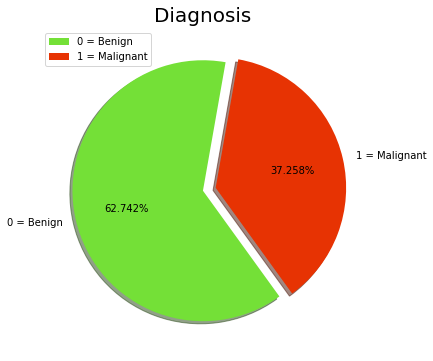

In [7]:
# 0 = Benign, 1 = Malignant
labels = ['0 = Benign', '1 = Malignant'] 
diagnosis_counts = df['diagnosis'].value_counts()

# bright green = Benign, bright red = Malignant
colors = ['#74E037', '#E73303']
explode = [0, 0.1]

# Create a pie plot
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, colors = colors, explode = explode, labels = labels, shadow = True, 
        startangle = 80, autopct='%.3f%%')
plt.title('Diagnosis',fontsize = 20)
plt.axis('off')
plt.legend()
plt.show

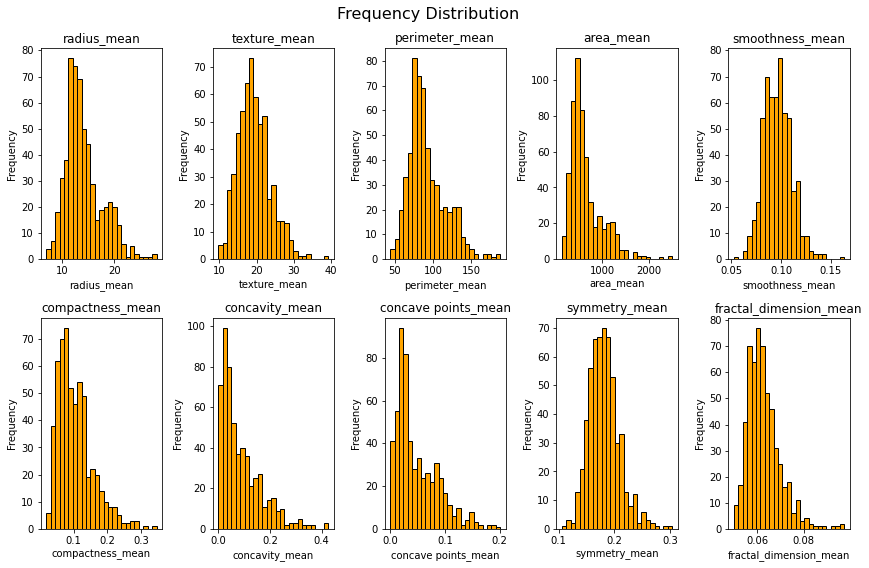

In [8]:
# Plotting all the mean feature values
columns_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
                 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

num_bins = 25

# Subplots for each mean feature
plt.figure(figsize=(12, 8))
plt.suptitle('Frequency Distribution', fontsize=16) 

for i, col in enumerate(columns_names, 1):
    plt.subplot(2, 5, i) 
    plt.hist(df[col], bins=num_bins, color='orange', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- We see that there are more benign than malignant cases.
- With the frequency distribution plot, we see that a majority of the plots are more right-skewed. With more means lying on the lower end of the values. Although there are some cases that are on the larger end.

# <font style="color: red">(Model 1, k-Nearest Neighbors)</font>
Why KNN for this?
1. KNN is a simple algorithm that is easy to understand/implement
2. Also good for binary classification
3. Usage of hyperparameter to find the most optimal k value

### Split Data Into Training and Testing Set 
1. Holding back 30% for testing
2. Setting the random state to 42
3. Features are the mean values
4. Target is the diagnosis

In [9]:
# Features (independent variables) for the dataset
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

# Target variable (dependent variable)
y = df['diagnosis']

# Split the data into training and testing sets, with 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Rescaling the Data
- Scaled the training and test data to ensure they both have the same scaling
- So the ML model's performance is much more reliable

In [10]:
# StandardScaler instance to standardize the feature data
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaling parameters
X_test_scaled = scaler.transform(X_test)


### KNN Classification
- Code below builds a KNN classifier with 6 neighbors
- Used a random number to do this classification before doing hyperparameter tuning (GridSearchCV) to find the best n_neighbors value
- Includes confusion matrix and accuracy

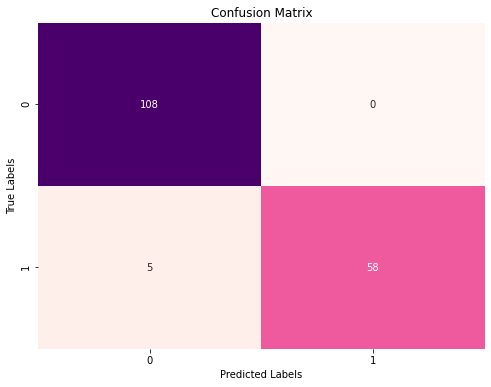

Accuracy with 6 neighbors: 0.9707602339181286


In [11]:
# Create and train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score on the test data
accuracy = knn_classifier.score(X_test_scaled, y_test)

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print('Accuracy with 6 neighbors:', accuracy)

### Using GridSearchCV to Find Optimal Hyperparameter
- Used GridSearchCV to search for optimal hyperparameter / best k value
- Used 5-fold cross-validation

In [12]:
# KNN classifier instance
knn_clf = KNeighborsClassifier()

# Range of values for the hyperparameter 'n_neighbors' - 1 to 50
parameters = {'n_neighbors': range(1, 51)}

# GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(knn_clf, parameters, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best 'n_neighbors' value from GridSearchCV
k_best = grid_search.best_params_['n_neighbors']

### Performance on Different K's

Text(0, 0.5, 'R-squared')

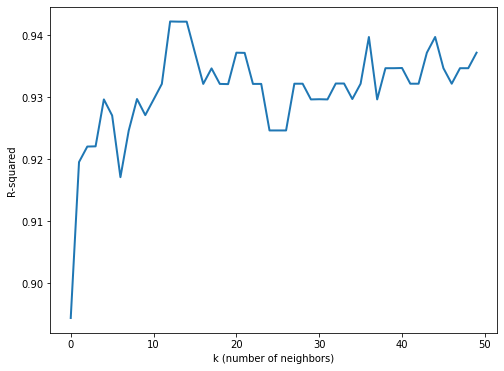

In [13]:
plt.figure(figsize=(8, 6))

# Plot R-squared
plt.plot(grid_search.cv_results_['mean_test_score'], linewidth=2)
plt.xlabel('k (number of neighbors)')
plt.ylabel('R-squared')

### Train Model, Predict
- Sets up and trains KNN Classifier with the best value of k (13)
    - Uses this model to make predicitions on test data

In [14]:
# Create KNN classifier with the best k value
knn_model = KNeighborsClassifier(n_neighbors=k_best)

# Fit the KNN classifier to the scaled training data
classifier = knn_model.fit(X_train_scaled, y_train)

# Trained KNN classifier to make predictions on the scaled test data
test_preds = knn_model.predict(X_test_scaled)

### Characterizing Model Performance on the Testing Data
- Displays performance metrics for accuracy, sensitivity, and specificity to evaluate performance of a binary classification

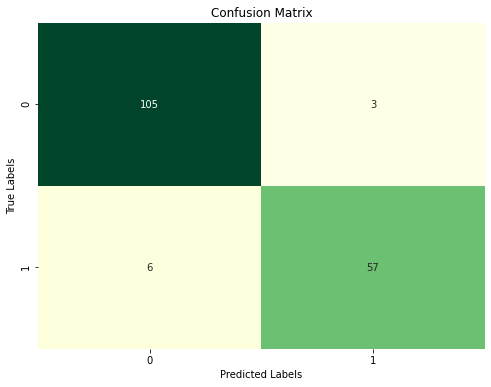

ACC: 0.9473684210526315
Sensitivity (TPR): 0.9047619047619048
Specificity (TNR): 0.9722222222222222


In [15]:
# Accuracy
acc = accuracy_score(y_test, test_preds)

# Confusion matrix
cm = confusion_matrix(y_test, test_preds)

# TPR = TP / (TP + FN) is
TPR = cm[1,1] / (cm[1,1] + cm[1,0])

# TNR = TN / (TN + FP)
TNR = cm[0,0] / (cm[0,0] + cm[0,1])

# A confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("ACC:", acc)
print("Sensitivity (TPR):", TPR)
print("Specificity (TNR):", TNR)

### Feature Importance for KNN (K-neighbors = 13)
- Wanted to find which feature was most relative
- Identifying highly influential features is crucial in healthcare decision-making, as it enables the healthcare system to patient outcomes

In [16]:
# KNN classifier with the best k value
knn_model = KNeighborsClassifier(n_neighbors=k_best)

# Fit the KNN model on the training data
knn_model.fit(X_train_scaled, y_train)

# Calculate feature importances using permutation importance
permutation_importances = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Get the importance scores and feature names
importance_scores = permutation_importances.importances_mean
feature_names = X.columns

# Create a list of (feature, importance) pairs
importance_pairs = list(zip(feature_names, importance_scores))
importance_pairs_sorted = sorted(importance_pairs, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted descending list
importance_df = pd.DataFrame(importance_pairs_sorted, columns=['Feature Name', 'Importance'])

# Print the DataFrame
importance_df['Importance'] = importance_df['Importance'].round(4)
print(importance_df)

             Feature Name  Importance
0     concave points_mean      0.0392
1          concavity_mean      0.0263
2            texture_mean      0.0248
3             radius_mean      0.0082
4          perimeter_mean      0.0072
5               area_mean      0.0064
6  fractal_dimension_mean      0.0041
7         smoothness_mean     -0.0010
8           symmetry_mean     -0.0055
9        compactness_mean     -0.0080


### Precision-Recall Curve summarizing model performance on both the training and testing data (KNN)
- A good diagnostic tool
- Precision tells you how many of the predicted malignant cases are truly malignant
- Recall indicates how many of the actual malignant cases were correctly identified

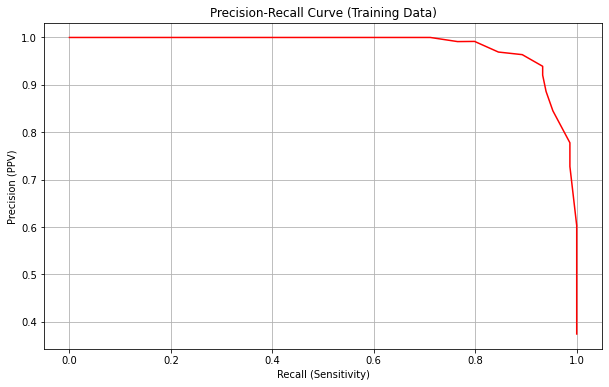

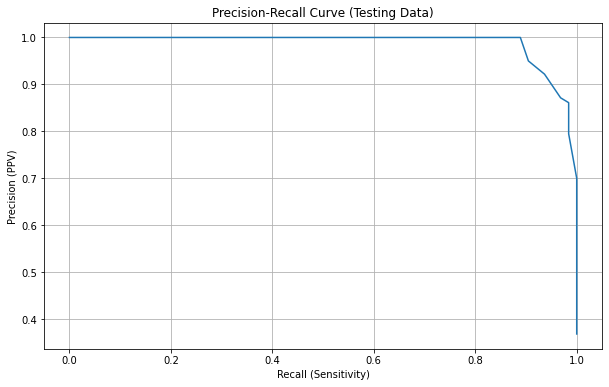

In [17]:
# Calculate precision-recall curve and for training data
train_precision, train_recall, train_thresholds = precision_recall_curve(y_train, knn_model.predict_proba(X_train_scaled)[:, 1])

# Plot for training data
plt.figure(figsize=(10, 6))
plt.plot(train_recall, train_precision, color='red', lw = 1.5)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision (PPV)')
plt.title('Precision-Recall Curve (Training Data)')
plt.grid(True)
plt.show()

# Same for testing data
test_precision, test_recall, test_thresholds = precision_recall_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])

# Plot for testing data
plt.figure(figsize=(10, 6))
plt.plot(test_recall, test_precision, lw = 1.5)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision (PPV)')
plt.title('Precision-Recall Curve (Testing Data)')
plt.grid(True)
plt.show()

# <font style="color: red">(Model 2, Naïve Bayes Classifier)</font>
Why Naïve Bayes Classifier for this?
1. Simple and efficient classification
2. Handles categorical data (using Gaussian Naïve Bayes for continuous features)
3. There is a low risk of overitting


### Split Data Into Training and Testing Set 
1. Holding back 30% for testing
2. Setting the random state to 42
3. Features are the mean values
4. Target is the diagnosis

In [18]:
# Features (independent variables) for the dataset
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

# Target variable (dependent variable)
y = df['diagnosis']

# Split the data into training and testing sets, with 70% of the data for training and 30% for testing
X_train_continuous, X_test_continuous, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_continuous

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801
...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544


###  GaussianNB estimator
- Using GaussianNB as my feature values are continuous.

In [19]:
# Create Gaussian Naïve Bayes classifier.
gnb = GaussianNB()

# Fit the GNB classifier to the continuous feature to training set.
gnb.fit(X_train_continuous, y_train)

GaussianNB()

In [20]:
# Use Gaussian Naïve Bayes (GNB) classifier to make prediction
y_pred_continuous = gnb.predict(X_test_continuous)
y_test

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int64

### Characterizing Model Performance on the Testing Data
- Displays performance metrics

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_continuous)

# Sensitivity = TPR = TP / (TP + FN)
sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])
print('Sensitivity (TPR) = ', sensitivity)

#Specifity = TNR = TN / (TN + FP)
specifity = cm[0,0] / (cm[0,0] + cm[0,1])
print('Specifity (TNR) =', specifity)
print('  ')
# Prints the precision, recall, f1-score, accuracy
print(classification_report(y_test, y_pred_continuous))

Sensitivity (TPR) =  0.873015873015873
Specifity (TNR) = 0.9629629629629629
  
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       108
           1       0.93      0.87      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



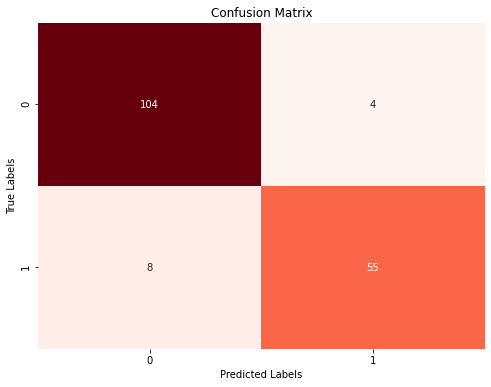

In [22]:
# Print CM heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve summarizing model performance
- A comprehensive performance of the classifier's performance.
- Choose to include this as it distinguishes between the two classes (malignant and benign) by varying the threshold for classifying instances (helps with TPR / FPR)|

Text(0.5, 1.0, 'Testing Data, AUC = 0.9896')

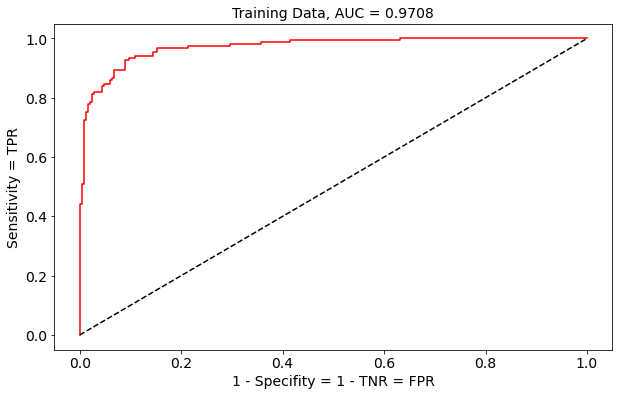

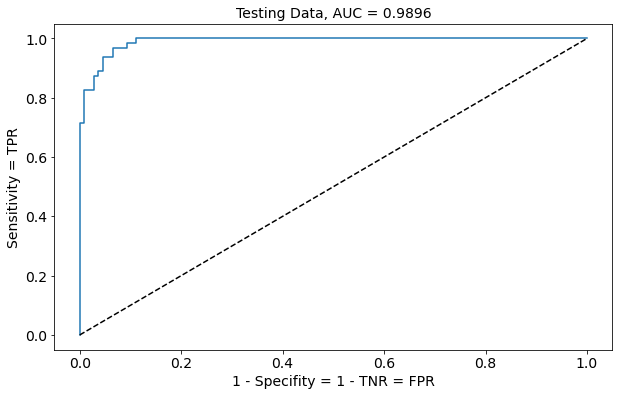

In [23]:
# Training Data
# Predict probabilities on the training data
y_train_prob = gnb.predict_proba(X_train_continuous)[:, 1]
FPR, TPR, thresholds = roc_curve(y_train, y_train_prob)

Y = TPR # True Positive Rate
X = FPR # False Positive Rate

fig2, ax2 = plt.subplots(1, 1, figsize=(10,6))

ax2.step(FPR, TPR, linewidth= 1.5, color = 'red')

# ROC curve
ax2.plot([0,1], [0,1], '--', color = 'black')


fs = 14
ax2.set_xlabel('1 - Specifity = 1 - TNR = FPR', fontsize=fs)
ax2.set_ylabel('Sensitivity = TPR', fontsize=fs)
ax2.tick_params(axis='both', labelsize=fs)

AUC = np.trapz(TPR, FPR)
AUC # Area Under Curve
ax2.set_title(f'Training Data, AUC = {AUC:.4f}', fontsize=fs)

# Testing Data
# Predict probabilities on the testing data
y_test_prob = gnb.predict_proba(X_test_continuous)[:, 1]
FPR, TPR, thresholds = roc_curve(y_test, y_test_prob)

Y = TPR # True Positive Rate
X = FPR # False Positive Rate

fig1, ax1 = plt.subplots(1, 1, figsize=(10,6))

ax1.step(FPR, TPR, linewidth= 1.5)

# ROC curve
ax1.plot([0,1], [0,1], '--', color = 'black')


fs = 14
ax1.set_xlabel('1 - Specifity = 1 - TNR = FPR', fontsize=fs)
ax1.set_ylabel('Sensitivity = TPR', fontsize=fs)
ax1.tick_params(axis='both', labelsize=fs)

AUC = np.trapz(TPR, FPR)
AUC
ax1.set_title(f'Testing Data, AUC = {AUC:.4f}', fontsize=fs)

### Precision-Recall Curve summarizing model performance on both the training and testing data (Naïve Bayes)

(0.0, 1.0)

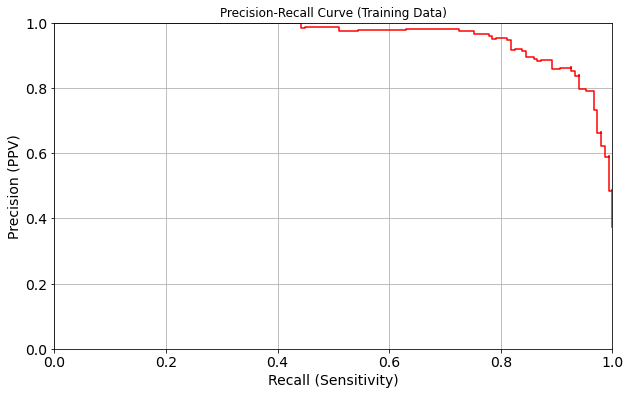

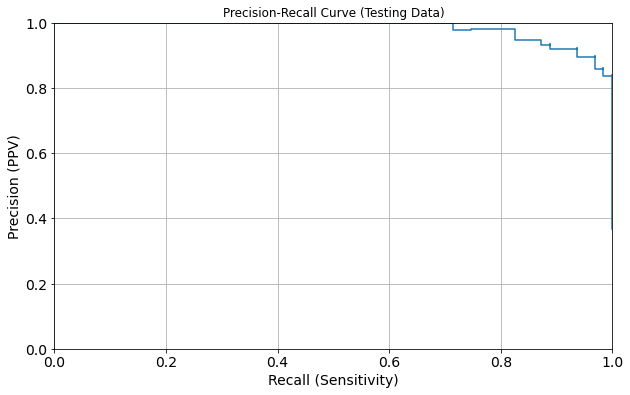

In [24]:
# Plotting Precision-Recall Curve, Training Data using Naive Bayes
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_prob)


fig3, ax3 = plt.subplots(1, 1, figsize=(10,6))

ax3.step(recalls, precisions, linewidth=1.5, color = 'red')
ax3.grid()

fs = 14
ax3.set_xlabel('Recall (Sensitivity)', fontsize=fs)
ax3.set_ylabel('Precision (PPV)', fontsize=fs)
ax3.tick_params(axis='both', labelsize=fs)

ax3.set_title('Precision-Recall Curve (Training Data)')
ax3.set_ylim([0, 1])
ax3.set_xlim([0, 1])

# Plotting Precision-Recall Curve, Testing Data using Naive Bayes
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_prob)


fig3, ax3 = plt.subplots(1, 1, figsize=(10,6))

ax3.step(recalls, precisions, linewidth=1.5)
ax3.grid()

ax3.set_xlabel('Recall (Sensitivity)', fontsize=fs)
ax3.set_ylabel('Precision (PPV)', fontsize=fs)
ax3.tick_params(axis='both', labelsize=fs)

ax3.set_title('Precision-Recall Curve (Testing Data)')
ax3.set_ylim([0, 1])
ax3.set_xlim([0, 1])

# <font style="color: red">(Model 3, Random Forest)</font>
Why Random Forest for this?
- Easily interpretable and easy to use
- Provides measure of feature importance
- High dimensionality
- Handles noisy data well

In [25]:
diagnosis_categories = list(df['diagnosis'].value_counts())
diagnosis_categories

[357, 212]

### Split Data Into Training and Testing Set
1. Holding back 30% for testing
2. Setting the random state to 42
3. Features are the mean values
4. Target is the diagnosis

In [26]:
# Features (independent variables) for the dataset
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
        'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

# Target variable (dependent variable)
y = df['diagnosis']

# Split the data into training and testing sets, with 70% of the data for training and 30% for testing

X_train_rf, X_test_rf, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_rf

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801
...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544


### Creating the Random Forest Classifier

In [27]:
# Create a Random Forest model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_rf, y_train)

# Predict and evaluate the Random Forest model
y_pred = rfc.predict(X_test_rf)


### Characterizing Model Performance on Random Forest (Testing Data)
- Displays performance metrics

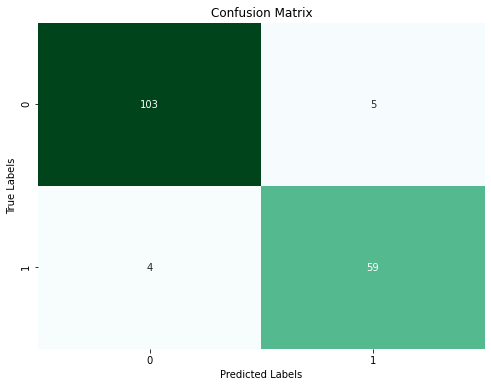

ACC on test set: 0.9473684210526315
Sensitivity (TPR): 0.9365079365079365
Specificity (TNR): 0.9537037037037037


In [28]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# TPR = TP / (TP + FN)
TPR = cm[1,1] / (cm[1,1] + cm[1,0])

# TNR = TN / (TN + FP)
TNR = cm[0,0] / (cm[0,0] + cm[0,1])

# A confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("ACC on test set:", acc)
print("Sensitivity (TPR):", TPR)
print("Specificity (TNR):", TNR)

### Precision-Recall Curve summarizing model performance on both the training and testing data (Random Forest)

(0.0, 1.0)

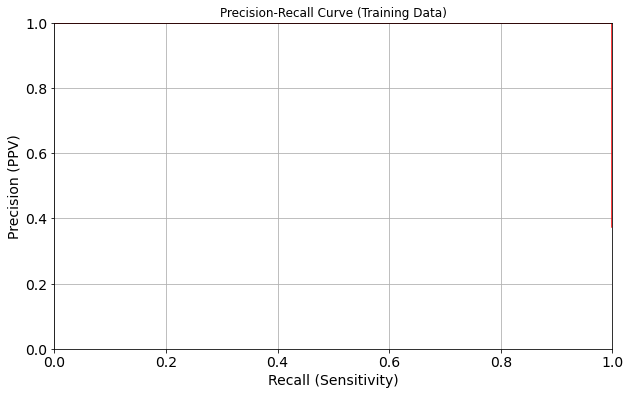

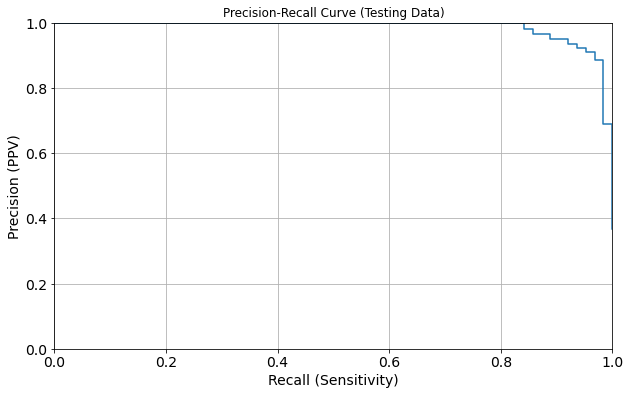

In [29]:
# Predict probabilities on the training data
y_probas_train_rf = rfc.predict_proba(X_train_rf)

# Calculate precision and recall values for the training data
precision_rf, recall_rf, thresholds_rfs = precision_recall_curve(y_train, y_probas_train_rf[:, 1])

# Precision-Recall curve plot for training data
fig3, ax3 = plt.subplots(1, 1, figsize=(10,6))
ax3.step(recall_rf, precision_rf, linewidth=1.5, color='red')
ax3.grid()

fs = 14
ax3.set_xlabel('Recall (Sensitivity)', fontsize=fs)
ax3.set_ylabel('Precision (PPV)', fontsize=fs)
ax3.tick_params(axis='both', labelsize=fs)
ax3.set_title('Precision-Recall Curve (Training Data)')
ax3.set_ylim([0, 1])
ax3.set_xlim([0, 1])

# Predict probabilities on the testing data
y_probas_test_rf = rfc.predict_proba(X_test_rf)

# Calculate precision and recall values for the testing data
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_probas_test_rf[:, 1])

# Precision-Recall curve plot for testing data
fig5, ax5 = plt.subplots(1, 1, figsize=(10,6))
ax5.step(recall_rf, precision_rf, linewidth=1.5)
ax5.grid()

fs = 14
ax5.set_xlabel('Recall (Sensitivity)', fontsize=fs)
ax5.set_ylabel('Precision (PPV)', fontsize=fs)
ax5.tick_params(axis='both', labelsize=fs)
ax5.set_title('Precision-Recall Curve (Testing Data)')
ax5.set_ylim([0, 1])
ax5.set_xlim([0, 1])

Text(0.5, 1.0, 'Testing Data, AUC = 0.9904')

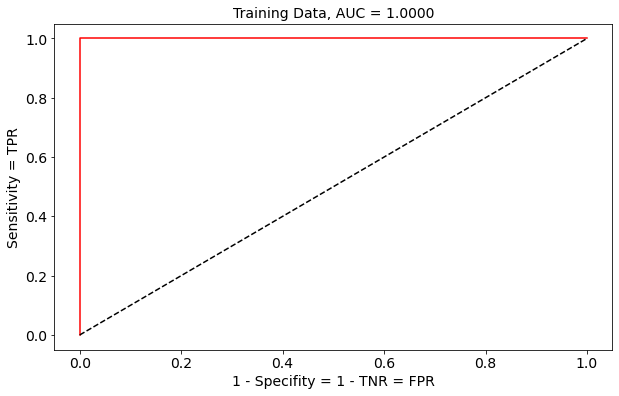

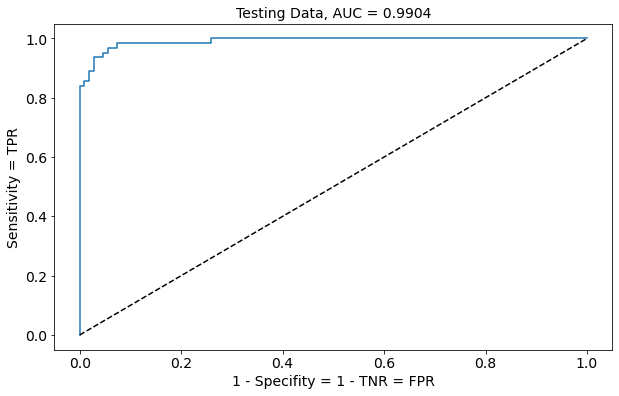

In [30]:
# Predict probabilities on the training data
y_pred_train_prob = rfc.predict_proba(X_train_rf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train_prob)
XX = tpr
Y = fpr
# Calculate the AUC (Area Under the Curve)

# Plot the ROC curve
fig1, ax1 = plt.subplots(1, 1, figsize=(10,6))

ax1.step(fpr, tpr, linewidth= 1.5, color = 'red')

# ROC curve
ax1.plot([0,1], [0,1], '--', color = 'black')


fs = 14
ax1.set_xlabel('1 - Specifity = 1 - TNR = FPR', fontsize=fs)
ax1.set_ylabel('Sensitivity = TPR', fontsize=fs)
ax1.tick_params(axis='both', labelsize=fs)

AUC = np.trapz(tpr, fpr)
AUC
ax1.set_title(f'Training Data, AUC = {AUC:.4f}', fontsize=fs)

# Predict probabilities on the testing data
y_pred_test_prob = rfc.predict_proba(X_test_rf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
XX = tpr
Y = fpr
# Calculate the AUC (Area Under the Curve)

# Plot the ROC curve
fig1, ax1 = plt.subplots(1, 1, figsize=(10,6))

ax1.step(fpr, tpr, linewidth= 1.5)

# ROC curve
ax1.plot([0,1], [0,1], '--', color = 'black')


fs = 14
ax1.set_xlabel('1 - Specifity = 1 - TNR = FPR', fontsize=fs)
ax1.set_ylabel('Sensitivity = TPR', fontsize=fs)
ax1.tick_params(axis='both', labelsize=fs)

AUC = np.trapz(tpr, fpr)
AUC
ax1.set_title(f'Testing Data, AUC = {AUC:.4f}', fontsize=fs)

### Feature Importance
- Measures feature importance by how much tree nodes that use a feature reduce impurity, averaged across all the trees 

In [31]:
# Iterate over feature names and their importances
for name, i in zip(X.columns, rfc.feature_importances_):
    print(name, ':', i)

radius_mean : 0.08987548935838141
texture_mean : 0.058564218055052915
perimeter_mean : 0.13548000254082165
area_mean : 0.10165475346463494
smoothness_mean : 0.022511890090666935
compactness_mean : 0.04683518320469924
concavity_mean : 0.18518754269916843
concave points_mean : 0.3184432785205431
symmetry_mean : 0.01998004812804616
fractal_dimension_mean : 0.021467593937985186


## Summary of Key Points

#### KNN (K-Nearest Neighbors):
- Achieved a high accuracy of approximately 97% with 6 neighbors.
- Hyperparameter tuning with GridSearchCV found the optimal value of 13 neighbors for KNN.
- Identified that the feature "concave points_mean" had the highest importance (0.0392) when using 13 neighbors in the KNN model.
- The accuracy, sensitivity (True Positive Rate), and specificity (True Negative Rate) for KNN with 13 neighbors were 94.74%, 90.48%, and 97.22%, respectively

#### Naive Bayes Classifier:
- Achieved an accuracy of 93%.
- Sensitivity (True Positive Rate) was 87.30%, and Specificity (True Negative Rate) was 96.30%.
- ROC curve has an AUC of 0.9896 for testing data


#### Random Forest:
- Achieved an accuracy of 94.74%.
- Sensitivity (True Positive Rate) was 93.70%, and Specificity (True Negative Rate) was 95.40%.
- Identified that the feature "concave points_mean" had the highest importance (0.3184).
- ROC curve has an AUC of 0.9904 for testing data.


# <font style="color: red">Discussion of Results:</font>
- Again to rehighlight feature selection: 
    - I only used features that ended in "mean" from the UCI dataset. I narrowed it down to only the mean values as these values are often more stable/less sensitive to outliers.
    - "mean" features may be more clinically relevant.
    - Reduced dimensionality - less prone to overfitting.
- The KNN with 6 neighbors achieved the highest accuracy among the models.
- However, the choice of the hyperparameter k impacts the bias-variance trade-off. The KNN model with k=6 has lower bias but higher variance because it closely fits the training data, potentially capturing noise. This results in a higher accuracy on the training data but may lead to overfitting on unseen data. 
- The KNN model with k=13 has higher bias but lower variance, making it more robust to noise and less prone to overfitting. As a result, it has a slightly lower accuracy but better generalization to unseen data. Thus, when using GridSearchCV, was found to be the best k.
- Feature importance highest with 'concave points_mean' = 0.0392 (k_best (13)).
- Naive Bayes also performed well with a sensitivity of 0.8730 and specificity of 0.9630, demonstrating its effectiveness in this context (as having a high specificity and sensitivity is good). Its accuracy of 0.9300 is also notable.
- The Random Forest model yielded an accuracy of 94.74%, indicating strong classification performance.
- Sensitivity (True Positive Rate) was 93.70% and Specificity (True Negative Rate) was 95.40% strike a balance between correctly identifying malignant tumors and avoiding misclassification.
- Additionally, both the Random Forest and KNN models identified that the feature "concave points_mean" holds the highest importance in classifying breast tumors as benign or malignant. 
- The consistent high importance of 'concave points_mean' highlights its critical role in distinguishing benign and malignant tumors (highlighting the feature's contribution to accurate breast cancer classification).
- The precision-recall curves are what would be expected. At the thresholds with low recall, the precision is high, and at very high recall, the precision drops for all three models (KNN, Naive Bayes, and Decision Tree).
- The two AUC scores are both very close to 1.00, which indicate they are both great for distinguishing between malignant/benign.
    - Random Forest: AUC (0.9904), random forest is an ensemble learning method known for robustness, which explains its high AUC score.
    - Naive Bayes: AUC (0.9896), known for simplicity, which also explains why its a good choice and has a high score.
- Also wanted to note the precision-recall curve on the training data for the decision tree - is a perfect model curve. As it goes from the top left corner horizontically to the top right corner and straight down to the bottom right corner. The ROC curve as well for this one is also perfect, has an AUC = 1.00.
    - This might be due to overfitting. Perhaps due to the number of trees.
    - Model may be too complex, the trees could have too high of a depth / complexity.
- When comparing these points (from the testing data) together, Random Forest has the highest overall scores.

### Best Model:
Based on the results, the Random Forest model is a strong choice for breast cancer diagnosis/classification. In contrast to the other models, this model excels in accurately identifying both malignant and benign cases of breast cancer.


### Real World Implications:
- These results imply that KNN is a robust model for breast cancer classification, particularly with an optimal neighbor count of 13. It is great for scenarios where high accuracy and minimizing false positives are crucial, such as in healthcare applications.

- Naive Bayes, although slightly less accurate, offers a good balance between sensitivity and specificity, making it a practical choice when minimizing false positives, while still maintaining a high level of overall accuracy. 
    - It could help ensure patients with high risk of breast cancer are referred for additional tests.

- Random Forest combines high accuracy with a strong balance of sensitivity and specificity. This model could be valuable in real-world applications where a balance between minimizing false positives and maximizing overall classification performance is needed.

- The consistent high importance of the "concave points_mean" feature across two models highlights its importance in the clinical breast cancer sense. 
    - In the real world, this could lead to further research on the role of concave points in breast tumor assessment. 
    - Could lead to a much more targeted diagnostic.

- Overall, these models could contribute to a timely intervention in breast cancer cases. Early detection would most likely improve patient outcomes.